<a href="https://colab.research.google.com/github/dhiyasalmas/Cylinder-Pellets-Distribution-Temperature/blob/main/Tugas2_Termodinamika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [55]:
r = np.arange(-0.7, 0.8, 0.1) #Fuel (cm)
rr = np.arange(0, 0.8, 0.8/15)
#r = np.flip(r)
tg = np.arange(0.7, 0.8001, (0.8-0.7)/14) #Ketebalan Gap (cm)
#tg = np.flip(tg)
tc = np.arange(0.8, 1.001, (1-0.8)/14) #Ketebalan Cladding (cm)
tcoo = np.arange(1, 1.5, (1.5-1)/15)
#print(r,"\n", rr,"\n",tg,"\n",tc)
print(len(rr),"\n",len(rr),"\n",len(tg),"\n",len(tc),"\n",len(tcoo))

15 
 15 
 15 
 15 
 15


In [52]:
#Konstanta Konduktivitas
kf = 0.024 #Uranium dioxide (W/cm.K)
kg = 0.002 #Helium (W/cm.K)
kc = 0.107 #SS (W/cm.K)
tb = 300+273.15 #Temperature coolant (K)

#Parameter
qv = 100 #volumetric heat rate (W/cc)
hs = 4.5 #heat trans coef of clad cool (W/cm^2.K)

In [62]:
#Mengitung Coolant
tcool = []
tcoo = np.flip(tcoo)
for i in range (len(rr)):
    tcoolant = tb + (rr[i]**2*qv)/(2*rr[i]*tcoo[i]*hs)
    tcool.append(tcoolant)
    i+= 1
#tcool = [x for x in tcool if str(x) != 'nan']
print(tcool)
print(len(tcool))

[nan, 573.5634366925065, 573.9965608465608, 574.45081300813, 574.9277777777778, 575.4292022792023, 575.9570175438596, 576.5133633633633, 577.1006172839506, 577.7214285714285, 578.3787581699346, 579.075925925926, 579.8166666666666, 580.6051971326165, 581.4462962962963]
15


<ipython-input-62-219ec4f9cc25>:5: RuntimeWarning: invalid value encountered in scalar divide
  tcoolant = tb + (rr[i]**2*qv)/(2*rr[i]*tcoo[i]*hs)


[1.46666667 1.43333333 1.4        1.36666667 1.33333333 1.3
 1.26666667 1.23333333 1.2        1.16666667 1.13333333 1.1
 1.06666667 1.03333333 1.        ]
[nan, 573.5634366925065, 573.9965608465608, 574.45081300813, 574.9277777777778, 575.4292022792023, 575.9570175438596, 576.5133633633633, 577.1006172839506, 577.7214285714285, 578.3787581699346, 579.075925925926, 579.8166666666666, 580.6051971326165, 581.4462962962963]


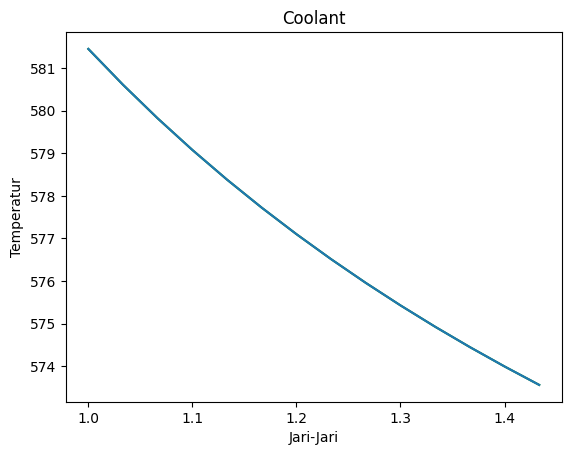

In [63]:
def gcool(tcoo, tcool):
  xpoints = tcoo
  ypoints = tcool
  print(xpoints)
  print(ypoints)
  fig, ax = plt.subplots()
  ax.plot(xpoints, ypoints, 'g', label='Grafik pada Coolant')
  plt.title('Coolant')
  plt.xlabel("Jari-Jari")
  plt.ylabel("Temperatur")
  plt.plot(xpoints,ypoints)
  plt.show()

gcool(tcoo, tcool)

In [68]:
#Menghitung Cladding
tclad = []
for i in range (len(tc)):
    tcc = tcool[-1] + qv*((rr[i])/2)*((tc[i])/kc)
    tclad.append(tcc)
    i += 1
print(tclad)
print(len(tclad))

[581.4462962962963, 606.0123844137862, 629.8664120061316, 653.0083790733323, 675.4382856153884, 697.1561316322998, 718.1619171240666, 738.4556420906888, 758.0373065321663, 776.9069104484993, 795.0644538396874, 812.5099367057311, 829.2433590466301, 845.2647208623844, 860.5740221529941]
15


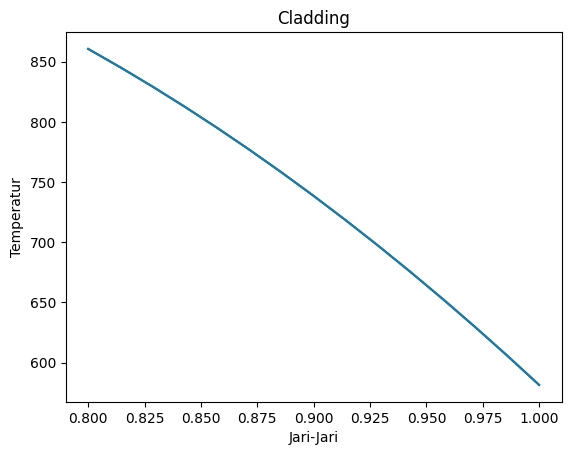

In [69]:
def gclad(radius , tclad):
  xpoints = radius
  ypoints = tclad
  fig, ax = plt.subplots()
  ax.plot(xpoints, ypoints, 'g', label='Grafik pada Cladding')
  plt.title('Cladding')
  plt.xlabel("Jari-Jari")
  plt.ylabel("Temperatur")
  plt.plot(xpoints,ypoints)
  plt.show()

gclad(tc, tclad)

In [76]:
tgap = []
tg = np.flip(tg)
for i in range (len(tg)):
    tgg = tclad[-1] + (((qv*rr[i])/2)*(tg[i]/kg))
    #tgg = tgap[0] + (((qv*radius[i+1])/2)*(thickness[i+1]/kg))
    #tgg = tgap[i-1] - (((qv*radius[i]**2)/(2*kg))*(math.log(radius[i]+thickness[i])/radius[i]))
    #tgg = tclad[-1] - ((qv*radius[i])/(2*kg))
    tgap.append(tgg)
    i += 1
print(tgap)
print(len(tgap))

[860.5740221529941, 1803.431165010137, 2765.3359269148987, 3746.2883078672794, 4746.288307867279, 5765.335926914898, 6803.431165010135, 7860.574022152992, 8936.76449834347, 10032.002593581563, 11146.288307867277, 12279.621641200607, 13432.00259358156, 14603.431165010132, 15793.90735548632]
15


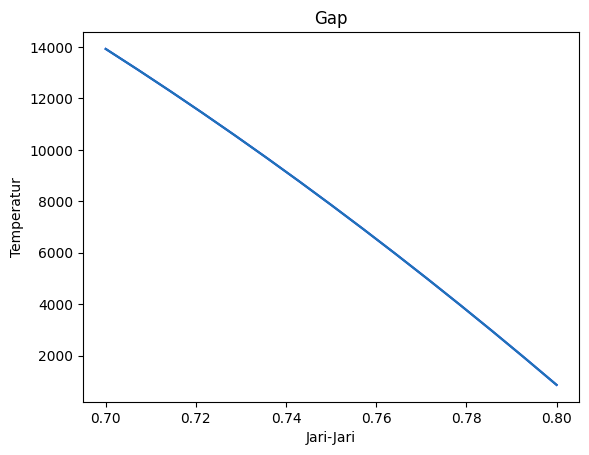

In [75]:
def ggap(radius, tgap):
  xpoints = radius
  ypoints = tgap
  fig, ax = plt.subplots()
  ax.plot(xpoints, ypoints, 'b', label='Grafik pada Gap')
  plt.title('Gap')
  plt.xlabel("Jari-Jari")
  plt.ylabel("Temperatur")
  plt.plot(xpoints,ypoints)
  plt.show()

#tgap = np.flip(tgap)
ggap(tg, tgap)

In [77]:
tfuel = []
print(tgap)
for i in range (len(r)):
    tr = tgap[-1] - qv*((r[i]**2)/(4*kf))
    #tr = tgap[0] + (((qv*radius[i]**2)/(4*kf)))
    #tr = qv*(ru**2/4*kf)*(1-(radius[i]**2/ru**2))+tgap[-1]
    #print(tr)
    tfuel.append(tr)
    i += 1

[860.5740221529941, 1803.431165010137, 2765.3359269148987, 3746.2883078672794, 4746.288307867279, 5765.335926914898, 6803.431165010135, 7860.574022152992, 8936.76449834347, 10032.002593581563, 11146.288307867277, 12279.621641200607, 13432.00259358156, 14603.431165010132, 15793.90735548632]


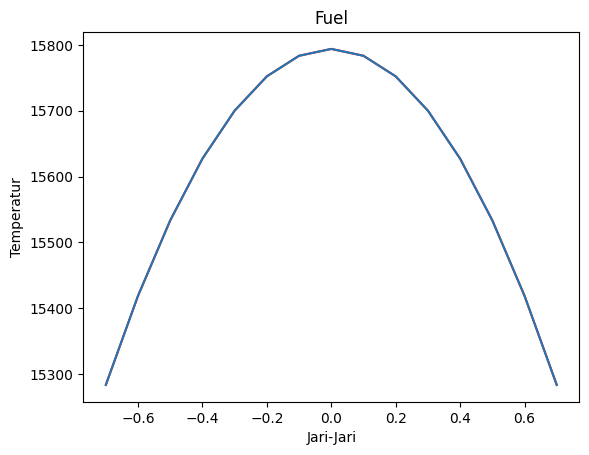

In [78]:
def gfuel(radius, tfuel):
  xpoints = radius
  ypoints = tfuel
  fig, ax = plt.subplots()
  ax.plot(xpoints, ypoints, 'r', label='Grafik pada Fuel')
  plt.title('Fuel')
  plt.xlabel("Jari-Jari")
  plt.ylabel("Temperatur")
  plt.plot(xpoints,ypoints)
  plt.show()

gfuel(r, tfuel)

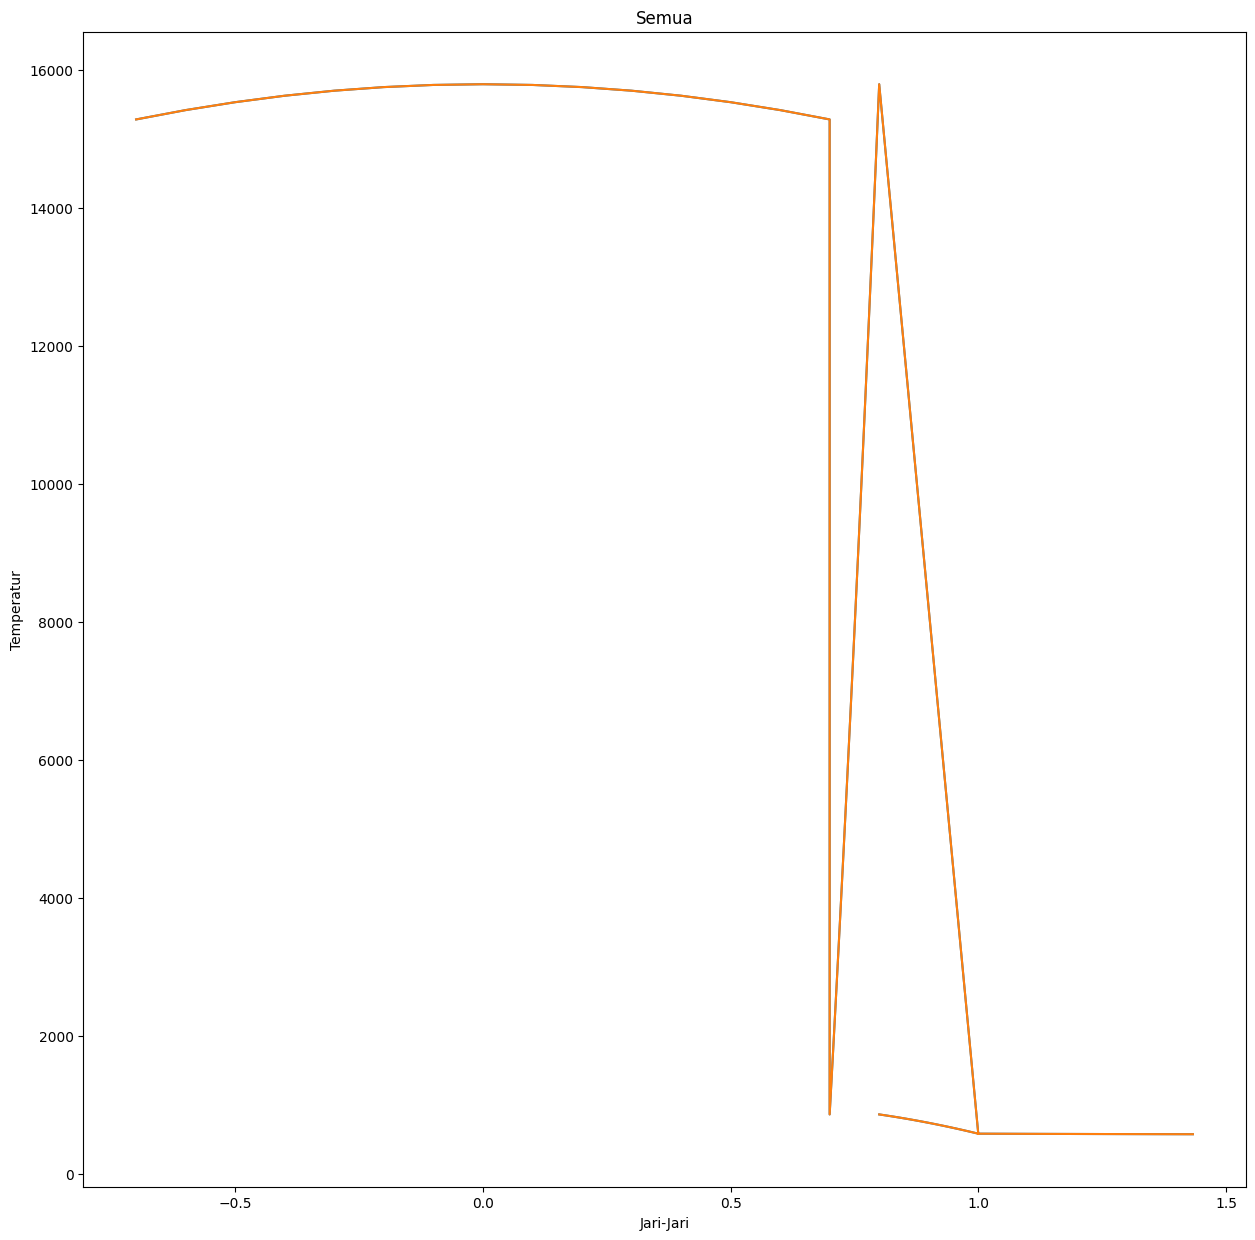

In [118]:
rsemua = np.array([])
tsemua = np.array([])
rsemua = np.append(rsemua,r)
rsemua = np.append(rsemua,tg)
rsemua = np.append(rsemua,tc)
rsemua = np.append(rsemua,tcoo)
tsemua = np.append(tsemua,tfuel)
tsemua = np.append(tsemua,tgap)
tsemua = np.append(tsemua,tclad)
tsemua = np.append(tsemua,tcool)

#print(rsemua)
rsemua = rsemua.flatten()
tsemua = tsemua.flatten()

xpoints = rsemua
ypoints = tsemua
fig, ax = plt.subplots()
ax.plot(xpoints, ypoints, label='Grafik Semua')
plt.title('Semua')
plt.xlabel("Jari-Jari")
plt.ylabel("Temperatur")
plt.rcParams['figure.figsize'] = [60, 60]
plt.plot(xpoints,ypoints)